In [467]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#reading dataset
df=pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv")

#previewing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [468]:
#previewing data distribution and it's characteristics
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [469]:
# Checking total number of customers
distinct_count = df['Customer ID'].nunique()
print("Total number of distinct values:", distinct_count)

Total number of distinct values: 12136


In [470]:
#checking for missing values
df.isnull().sum()

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

In [471]:
#filling the 1 missing gender value with the mode for Genders
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df.isnull().sum()

Customer ID             0
Age                     0
Gender                  0
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

In [472]:
#Fixing payment method as it had Paypal and PayPal, with 1 letter being uppercase that is recognized separately
df['Payment Method'] = df['Payment Method'].str.lower()

In [473]:
#Assigning non-numerical values in dataset a numerical value for a more complete correlation matrix
df_encoded = df.copy()

# Mapping for encoding
gender_mapping = {'Male': 1, 'Female': 0}
loyalty_member_mapping = {'Yes': 1, 'No': 0}
product_type_mapping = {
    'Smartphone': 1,
    'Tablet': 2,
    'Laptop': 3,
    'Smartwatch': 4,
    'Headphones': 5
}
order_status_mapping = {'Completed': 1, 'Cancelled': 0}
payment_method_mapping = {
    'Credit Card': 1,
    'Debit Card': 2,
    'Cash': 3,
    'Paypal': 4,
    'Bank Transfer': 5
}
shipping_type_mapping = {
    'Standard': 1,
    'Express': 2,
    'Overnight': 3,
    'Same Day': 4,
    'Expedited': 5
}
add_ons_mapping = {
    'Accessory': 1,
    'Impulse Item': 2,
    'Extended Warranty': 3
}

# Apply mapping to the copied DataFrame
df_encoded['Gender'] = df_encoded['Gender'].map(gender_mapping)
df_encoded['Loyalty Member'] = df_encoded['Loyalty Member'].map(loyalty_member_mapping)
df_encoded['Product Type'] = df_encoded['Product Type'].map(product_type_mapping)
df_encoded['Order Status'] = df_encoded['Order Status'].map(order_status_mapping)
df_encoded['Payment Method'] = df_encoded['Payment Method'].map(payment_method_mapping)
df_encoded['Shipping Type'] = df_encoded['Shipping Type'].map(shipping_type_mapping)
df_encoded['Purchase Date'] = pd.to_datetime(df_encoded['Purchase Date'], errors='coerce')

print(df_encoded)

       Customer ID  Age  Gender  Loyalty Member  Product Type      SKU  \
0             1000   53       1               0             1  SKU1004   
1             1000   53       1               0             2  SKU1002   
2             1002   41       1               0             3  SKU1005   
3             1002   41       1               1             1  SKU1004   
4             1003   75       1               1             1  SKU1001   
...            ...  ...     ...             ...           ...      ...   
19995        19996   27       0               0             1   SMP234   
19996        19996   27       0               1             3   LTP123   
19997        19996   27       0               0             5   HDP456   
19998        19997   27       1               0             5   HDP456   
19999        19998   27       1               1             3   LTP123   

       Rating  Order Status  Payment Method  Total Price  Unit Price  \
0           2             0            

In [474]:
#previewing encoded dataset
df_encoded.describe()

,Customer ID,Age,Gender,Loyalty Member,Product Type,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,0.0,20000.000000,20000.000000,20000.000000,20000,20000.000000,20000.000000
mean,10483.526550,48.994100,0.508250,0.217150,2.594800,3.093950,0.671600,NaN,3180.133419,578.631867,5.485550,2024-04-18 10:42:18.720000256,2.650400,62.244848
min,1000.000000,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,20.750000,20.750000,1.000000,2023-09-24 00:00:00,1.000000,0.000000
25%,5478.000000,33.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,1139.680000,361.180000,3.000000,2024-02-05 00:00:00,1.000000,7.615000
50%,10499.500000,49.000000,1.000000,0.000000,2.000000,3.000000,1.000000,NaN,2534.490000,463.960000,5.000000,2024-04-24 00:00:00,2.000000,51.700000
75%,15504.000000,65.000000,1.000000,0.000000,4.000000,4.000000,1.000000,NaN,4639.600000,791.190000,8.000000,2024-07-08 00:00:00,4.000000,93.842500
max,19998.000000,80.000000,1.000000,1.000000,5.000000,5.000000,1.000000,NaN,11396.800000,1139.680000,10.000000,2024-09-23 00:00:00,5.000000,292.770000
std,5631.732525,18.038745,0.499944,0.412316,1.354845,1.223764,0.469643,NaN,2544.978675,312.274076,2.870854,NaN,1.486469,58.058431


In [475]:
#correlation between columns
df_encoded.drop('SKU',axis=1,inplace=True)
df_encoded.drop('Purchase Date',axis=1,inplace=True)
df_encoded.drop('Add-ons Purchased',axis=1,inplace=True)
df_encoded.corr()

,Customer ID,Age,Gender,Loyalty Member,Product Type,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Shipping Type,Add-on Total
Customer ID,1.000000,-0.013297,0.004108,0.000699,0.265141,-0.076836,0.001435,NaN,0.203207,0.297445,0.010464,0.383528,0.317418
Age,-0.013297,1.000000,0.008777,0.000045,-0.007447,0.002949,-0.001633,NaN,0.003096,-0.004402,0.008555,-0.010544,-0.005291
Gender,0.004108,0.008777,1.000000,-0.000808,0.011506,-0.006947,-0.009757,NaN,-0.005367,-0.004815,0.002870,0.012359,-0.023193
Loyalty Member,0.000699,0.000045,-0.000808,1.000000,0.016092,0.004754,0.000837,NaN,-0.008835,-0.005417,-0.005354,-0.008378,0.000577
Product Type,0.265141,-0.007447,0.011506,0.016092,1.000000,-0.095530,0.003744,NaN,-0.099404,-0.145182,0.006156,0.131933,0.101663
Rating,-0.076836,0.002949,-0.006947,0.004754,-0.095530,1.000000,0.004182,NaN,-0.232429,-0.343829,-0.008587,-0.042966,-0.044338
Order Status,0.001435,-0.001633,-0.009757,0.000837,0.003744,0.004182,1.000000,NaN,-0.003595,-0.003422,-0.001183,-0.003307,-0.000876
Payment Method,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Price,0.203207,0.003096,-0.005367,-0.008835,-0.099404,-0.232429,-0.003595,NaN,1.000000,0.673951,0.653872,0.108004,0.083924
Unit Price,0.297445,-0.004402,-0.004815,-0.005417,-0.145182,-0.343829,-0.003422,NaN,0.673951,1.000000,0.006715,0.151453,0.125189


In [476]:
#Checking Skewness and Kurtosis
skewness = df_encoded.skew()
kurtosis = df_encoded.kurt()
print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

Skewness:
Customer ID       0.005316
Age               0.002510
Gender           -0.033007
Loyalty Member    1.372144
Product Type      0.282507
Rating            0.132853
Order Status     -0.730841
Payment Method         NaN
Total Price       0.903510
Unit Price       -0.027031
Quantity          0.001913
Shipping Type     0.296752
Add-on Total      0.936524
dtype: float64

Kurtosis:
Customer ID      -1.287643
Age              -1.191713
Gender           -1.999110
Loyalty Member   -0.117234
Product Type     -1.190464
Rating           -0.791064
Order Status     -1.466018
Payment Method         NaN
Total Price       0.288781
Unit Price       -0.708225
Quantity         -1.226508
Shipping Type    -1.349522
Add-on Total      0.392988
dtype: float64


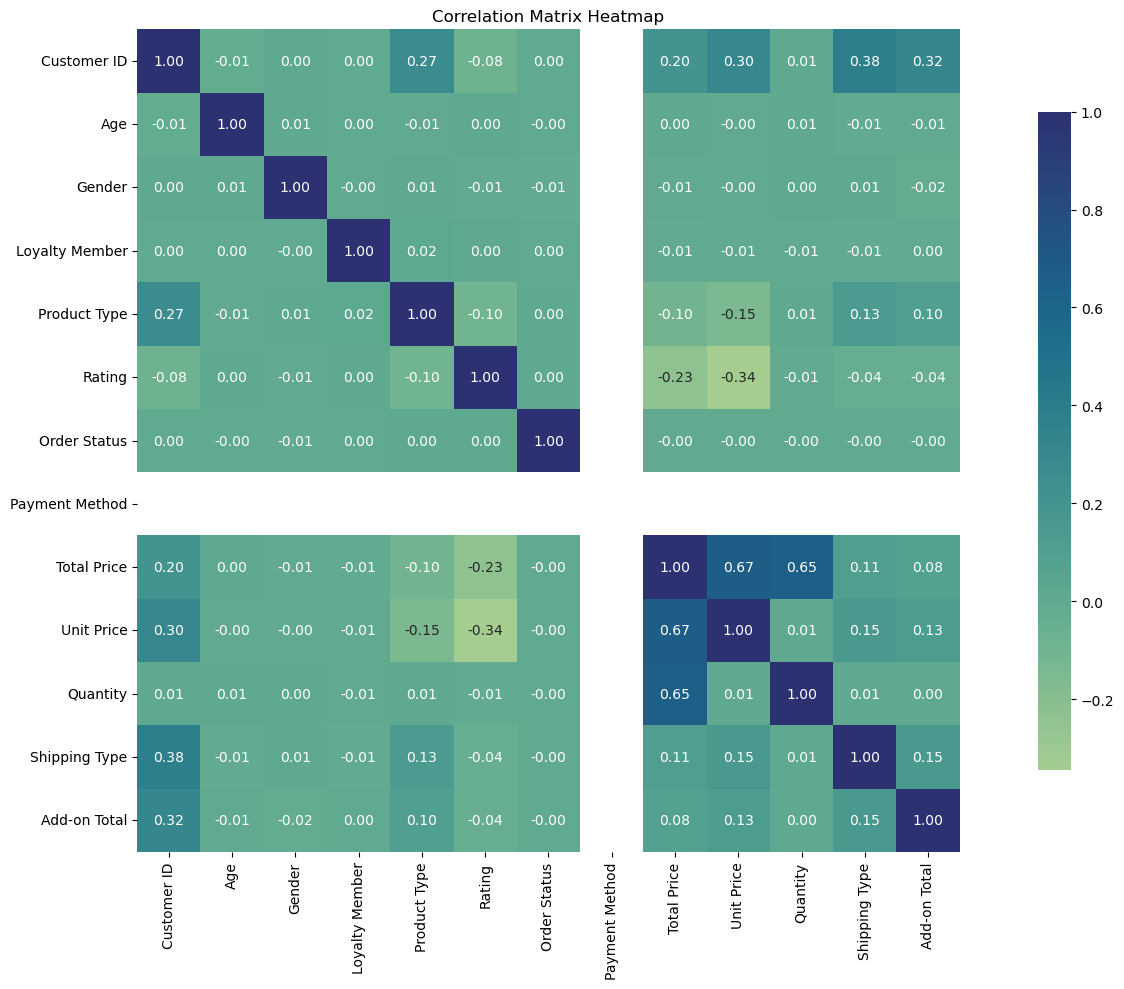

In [477]:
correlation_matrix = df_encoded.corr()

# Plotting a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [478]:
#Creating a Function for Line Plot
def MakeLinePlot(x, y, title="Line Plot", xlabel="X-axis", ylabel="Y-axis", linestyle="-", ylim=None):
    """
    Returns a Line plot with parameters that take data for x & y axis, also labels & titles that can be customized
    """
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, color = (0.2,0.4,0.2,0.6), linestyle=linestyle)
    plt.scatter(x, y,color = (0.2,0.2,0.4,1), label='Points')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.5)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'£{x/1_000_000:.0f}M'))  # Format y-axis labels
    if ylim:
        plt.ylim(ylim)
    plt.show()

In [479]:
#Creating a Function for Bar Chart
def MakeBarChart(data, category, value,title="Bar Chart", xlabel="X-axis", ylabel="Y-axis"):
    """
    Returns a bar chart from a catergory & value in parameters, with customizable title & labels.
    """
    GroupViaCategory = data.groupby(category)[value].sum().reset_index() # Grouping by category
    plt.figure(figsize=(8, 6))
    plt.bar(GroupViaCategory[category], GroupViaCategory[value], color = (0.2,0.4,0.2,0.6))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    # Adding labels for data
    for index, value in enumerate(GroupViaCategory[value]):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

In [480]:
#Creating a Function for Violin Plot
def MakeViolinPlot(data, category, value, title="Bar Chart", xlabel="X-axis", ylabel="Y-axis"):
    """
    Returns a violin plot from a catergory & value in parameters, with customizable title & labels.
    """
    plt.figure(figsize=(12, 7))
    sns.violinplot(x=category, y=value, data=data, hue=category, palette='crest', inner=None, legend=False)
    sns.boxplot(x=category, y=value, data=data, color='white', width=0.2, fliersize=0) # Making box plots on top for median & quartiles
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

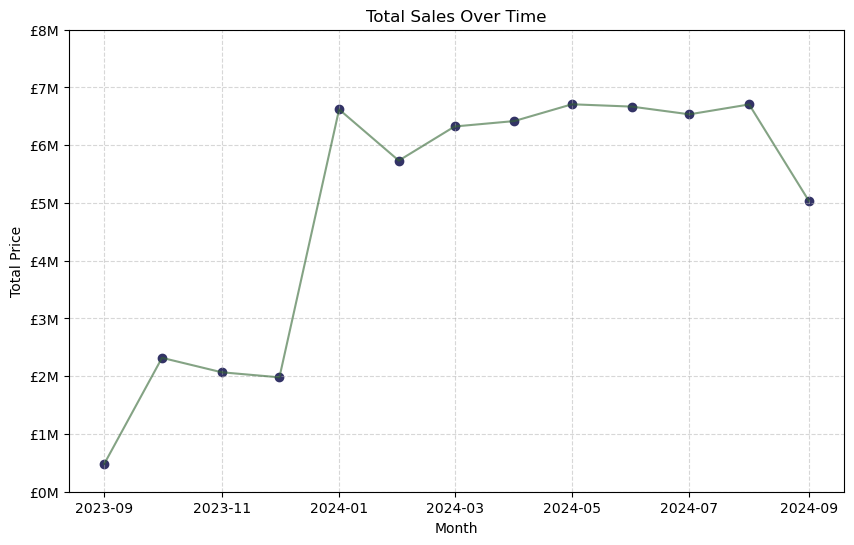

In [481]:
# Optimizing data to call line plot function to create a plot for total sales over time based on total price and purchase date (grouped by months):
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['GroupMonth'] = df['Purchase Date'].dt.to_period('M')
df_sales = df.groupby('GroupMonth')['Total Price'].sum().reset_index()
df_sales['GroupMonth'] = df_sales['GroupMonth'].dt.to_timestamp()
MakeLinePlot(df_sales['GroupMonth'], df_sales['Total Price'], title="Total Sales Over Time", xlabel="Month", ylabel="Total Price", linestyle='-',ylim=(0, 8000000))

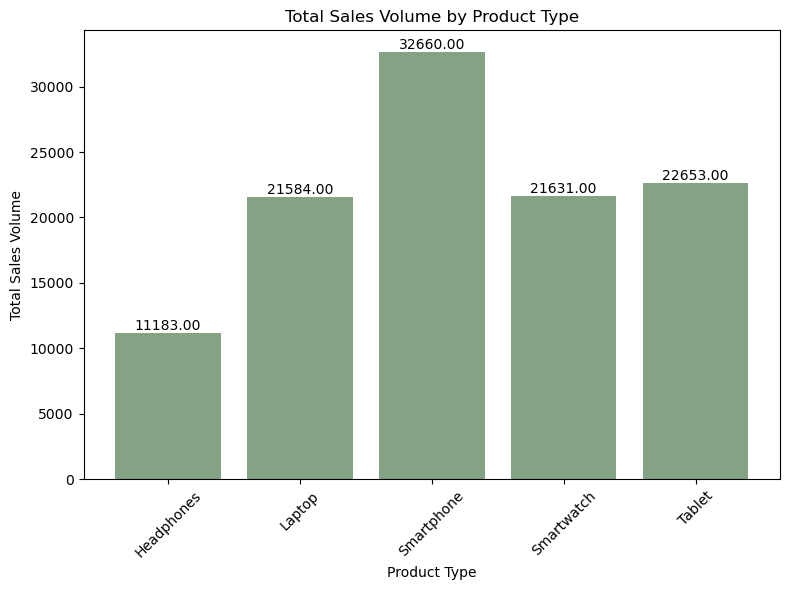

In [482]:
#Calling function to plot bar chart
MakeBarChart(df, 'Product Type', 'Quantity',title='Total Sales Volume by Product Type',xlabel='Product Type',ylabel='Total Sales Volume')

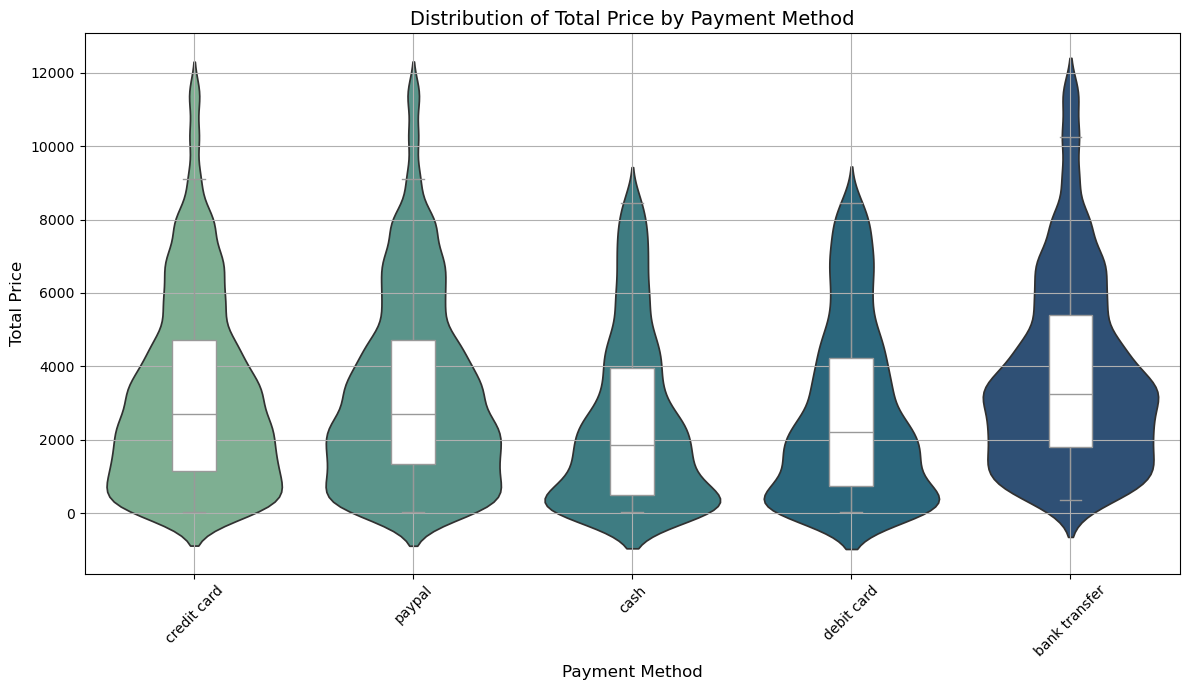

In [483]:
#Calling function to make violon plot
MakeViolinPlot(df, 'Payment Method', 'Total Price',title='Distribution of Total Price by Payment Method', xlabel='Payment Method', ylabel='Total Price')